In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from scipy.stats import spearmanr, pearsonr, zscore, rankdata
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def read_csv(path, sep=","): # ANOTHER VERSION OF THIS FUNCTION BELOW!!!
    return pd.read_csv(path, sep=sep, index_col=0)

## Frequencies of terms

### Flashback

In [4]:
#F = read_csv("../../img/dwts-year.csv")

In [5]:
F = read_csv("../../dw_results/fb_pol-yearly-radical3-restricted.csv", sep=";")

In [ ]:
F.index

In [6]:
F = F.drop(index="P1_självständig_utrikespolitik")
F = F.drop(index=['oberikade', 'antiglobalister', 'antiglobalistisk', 'antiglobalistiska', 'antiglobalist', 'massåtervandring'])


In [ ]:
F

In [7]:
F["fpm_2000"]

N1_kulturberikare     26.779306
V1_berika             25.589115
N1_berikare           12.497010
N1_globalist           0.000000
V1_kulturberika        0.000000
N1_återvandring        0.000000
V1_återvandra          0.000000
A1_globalistisk        0.000000
V1_hjälpa_på_plats     0.000000
N1_förortsgäng         0.000000
N2_återvandrare        0.000000
Name: fpm_2000, dtype: float64

In [8]:
F.loc[:, "fpm_2000":"fpm_2022"]

,fpm_2000,fpm_2001,fpm_2002,fpm_2003,fpm_2004,fpm_2005,fpm_2006,fpm_2007,fpm_2008,fpm_2009,fpm_2010,fpm_2011,fpm_2012,fpm_2013,fpm_2014,fpm_2015,fpm_2016,fpm_2017,fpm_2018,fpm_2019,fpm_2020,fpm_2021,fpm_2022
N1_kulturberikare,26.779306,24.431040,6.064344,0.000000,7.260190,3.217918,5.143675,17.072997,27.597314,18.145957,21.943560,12.165862,12.860996,10.569251,4.380426,3.114593,4.511033,3.243802,5.472025,5.359361,2.723959,3.105861,1.989073
V1_berika,25.589115,19.195817,18.193032,19.445548,15.528739,11.799032,18.679661,39.095494,53.596328,59.836667,41.482074,40.041816,35.842475,31.257997,24.913670,26.625442,32.075819,24.641511,23.351810,29.408475,22.908498,15.674893,13.011853
N1_berikare,12.497010,0.000000,0.000000,0.000000,0.000000,0.000000,1.353599,11.845434,23.086556,19.975549,9.878577,8.223406,9.192591,6.206624,4.254067,4.671889,3.632569,3.556800,3.220163,3.863093,2.397084,0.800730,0.546995
N1_globalist,0.000000,0.000000,0.000000,0.000000,0.000000,3.217918,2.910237,1.779596,11.152582,7.318369,6.479711,8.840659,17.780975,19.969138,18.364092,17.324922,49.360198,79.729230,106.603151,112.546589,101.549206,80.946505,91.629963
V1_kulturberika,0.000000,0.000000,0.000000,0.000000,0.000000,1.608959,1.353599,8.286243,8.453231,7.858249,6.559216,5.356165,5.588923,4.609992,2.442930,2.790156,2.587908,1.707264,1.666378,1.713907,1.825053,1.140433,0.596722
N1_återvandring,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.030398,3.670416,5.079042,2.249499,4.034912,1.095127,3.992088,4.992284,4.001350,3.222738,4.985879,5.207155,88.768403,46.357116,40.423557,45.010722,38.173626
V1_återvandra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676799,1.445922,0.816909,1.019773,1.013697,0.716810,0.949470,1.439217,0.989808,0.648873,0.498588,0.768269,6.980772,3.917503,3.840783,5.071289,3.845541
A1_globalistisk,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.349676,1.589646,1.311843,2.628304,5.329977,4.699943,5.222815,3.547175,7.265137,13.771930,16.573705,21.872724,19.094955,13.660936,11.752106
V1_hjälpa_på_plats,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.599866,1.172708,0.776544,1.122100,1.349266,3.853932,6.618510,1.851898,2.020262,1.643859,1.333039,1.743334,1.431608,0.613298
N1_förortsgäng,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.569873,0.000000,0.000000,0.000000,0.314829,0.526493,0.389324,0.284907,0.398362,0.540447,0.788942,0.299636,0.509555,0.663024


In [9]:
F["M_frq"] = np.mean(F.loc[:,"fpm_2000": "fpm_2022"], axis=1)

In [10]:
F["Std_frq"] = np.std(F.loc[:,"fpm_2000": "fpm_2022"], axis=1)

In [11]:
years = sorted([int(col.replace("frq_", "")) for col in F.columns if col.startswith("frq")])

In [12]:
lines = {}
for word in F.index:
    print(word)
    lines[word] = F.loc[word][[col for col in F.columns if col.startswith("fpm")]]

N1_kulturberikare
V1_berika
N1_berikare
N1_globalist
V1_kulturberika
N1_återvandring
V1_återvandra
A1_globalistisk
V1_hjälpa_på_plats
N1_förortsgäng
N2_återvandrare


In [ ]:
# plt.figure(figsize=(12, 12), dpi=80)

# for word in lines.keys():
#     plt.plot(years, zscore(lines[word]), label=word)
# plt.legend(loc="upper left")
# plt.show()

In [ ]:
45 / 2087305

In [ ]:
31000 / 785395806

In [ ]:
5528 / (68107024 * 10^6)

In [ ]:
5528 / 68107024

In [ ]:
10^6

In [ ]:
10**6

### Familjeliv

In [14]:
R = read_csv("../../dw_results/fm_smh-yearly-radical3-restricted.csv", sep=";")

In [15]:
R

,frq_2003,frq_2004,frq_2005,frq_2006,frq_2007,frq_2008,frq_2009,frq_2010,frq_2011,frq_2012,frq_2013,frq_2014,frq_2015,frq_2016,frq_2017,frq_2018,frq_2019,frq_2020,frq_2021,frq_2022,tot_frq,doc_frq,diffrq_2003:2004,diffrq_2004:2005,diffrq_2005:2006,diffrq_2006:2007,diffrq_2007:2008,diffrq_2008:2009,diffrq_2009:2010,diffrq_2010:2011,diffrq_2011:2012,diffrq_2012:2013,diffrq_2013:2014,diffrq_2014:2015,diffrq_2015:2016,diffrq_2016:2017,diffrq_2017:2018,diffrq_2018:2019,diffrq_2019:2020,diffrq_2020:2021,diffrq_2021:2022,fpm_2003,fpm_2004,fpm_2005,fpm_2006,fpm_2007,fpm_2008,fpm_2009,fpm_2010,fpm_2011,fpm_2012,fpm_2013,fpm_2014,fpm_2015,fpm_2016,fpm_2017,fpm_2018,fpm_2019,fpm_2020,fpm_2021,fpm_2022,diffpm_2003:2004,divfpm_2003:2004,diffpm_2004:2005,divfpm_2004:2005,diffpm_2005:2006,divfpm_2005:2006,diffpm_2006:2007,divfpm_2006:2007,diffpm_2007:2008,divfpm_2007:2008,diffpm_2008:2009,divfpm_2008:2009,diffpm_2009:2010,divfpm_2009:2010,diffpm_2010:2011,divfpm_2010:2011,diffpm_2011:2012,divfpm_2011:2012,diffpm_2012:2013,divfpm_2012:2013,diffpm_2013:2014,divfpm_2013:2014,diffpm_2014:2015,divfpm_2014:2015,diffpm_2015:2016,divfpm_2015:2016,diffpm_2016:2017,divfpm_2016:2017,diffpm_2017:2018,divfpm_2017:2018,diffpm_2018:2019,divfpm_2018:2019,diffpm_2019:2020,divfpm_2019:2020,diffpm_2020:2021,divfpm_2020:2021,diffpm_2021:2022,divfpm_2021:2022,gch_2010:2011,gch_2015:2016,gch_2013:2014,gch_2021:2022,gch_2020:2021,gch_2008:2009,gch_2017:2018,gch_2014:2015,gch_2003:2004,gch_2009:2010,gch_2019:2020,gch_2007:2008,gch_2016:2017,gch_2005:2006,gch_2012:2013,gch_2018:2019,gch_2006:2007,gch_2011:2012,gch_2004:2005,mccc_2003:2004,stdc_2003:2004,mccc_2004:2005,stdc_2004:2005,mccc_2005:2006,stdc_2005:2006,mccc_2006:2007,stdc_2006:2007,mccc_2007:2008,stdc_2007:2008,mccc_2008:2009,stdc_2008:2009,mccc_2009:2010,stdc_2009:2010,mccc_2010:2011,stdc_2010:2011,mccc_2011:2012,stdc_2011:2012,mccc_2012:2013,stdc_2012:2013,mccc_2013:2014,stdc_2013:2014,mccc_2014:2015,stdc_2014:2015,mccc_2015:2016,stdc_2015:2016,mccc_2016:2017,stdc_2016:2017,mccc_2017:2018,stdc_2017:2018,mccc_2018:2019,stdc_2018:2019,mccc_2019:2020,stdc_2019:2020,mccc_2020:2021,stdc_2020:2021,mccc_2021:2022,stdc_2021:2022,rch_2003:2004,rch_2004:2005,rch_2005:2006,rch_2006:2007,rch_2007:2008,rch_2008:2009,rch_2009:2010,rch_2010:2011,rch_2011:2012,rch_2012:2013,rch_2013:2014,rch_2014:2015,rch_2015:2016,rch_2016:2017,rch_2017:2018,rch_2018:2019,rch_2019:2020,rch_2020:2021,rch_2021:2022,gsim_2010:2011,gsim_2015:2016,gsim_2013:2014,gsim_2021:2022,gsim_2020:2021,gsim_2008:2009,gsim_2017:2018,gsim_2014:2015,gsim_2003:2004,gsim_2009:2010,gsim_2019:2020,gsim_2007:2008,gsim_2016:2017,gsim_2005:2006,gsim_2012:2013,gsim_2018:2019,gsim_2006:2007,gsim_2011:2012,gsim_2004:2005,mcsim_2003:2004,stdsim_2003:2004,mcsim_2004:2005,stdsim_2004:2005,mcsim_2005:2006,stdsim_2005:2006,mcsim_2006:2007,stdsim_2006:2007,mcsim_2007:2008,stdsim_2007:2008,mcsim_2008:2009,stdsim_2008:2009,mcsim_2009:2010,stdsim_2009:2010,mcsim_2010:2011,stdsim_2010:2011,mcsim_2011:2012,stdsim_2011:2012,mcsim_2012:2013,stdsim_2012:2013,mcsim_2013:2014,stdsim_2013:2014,mcsim_2014:2015,stdsim_2014:2015,mcsim_2015:2016,stdsim_2015:2016,mcsim_2016:2017,stdsim_2016:2017,mcsim_2017:2018,stdsim_2017:2018,mcsim_2018:2019,stdsim_2018:2019,mcsim_2019:2020,stdsim_2019:2020,mcsim_2020:2021,stdsim_2020:2021,mcsim_2021:2022,stdsim_2021:2022,rsim_2003:2004,rsim_2004:2005,rsim_2005:2006,rsim_2006:2007,rsim_2007:2008,rsim_2008:2009,rsim_2009:2010,rsim_2010:2011,rsim_2011:2012,rsim_2012:2013,rsim_2013:2014,rsim_2014:2015,rsim_2015:2016,rsim_2016:2017,rsim_2017:2018,rsim_2018:2019,rsim_2019:2020,rsim_2020:2021,rsim_2021:2022
V1_berika,0.0,25.0,61.0,156.0,239.0,188.0,226.0,225.0,263.0,188.0,119.0,114.0,90.0,35.0,29.0,16.0,15.0,20.0,14.0,24.0,2047.0,19,25.0,36.0,95.0,83.0,-51.0,38.0,-1.0,38.0,-75.0,-69.0,-5.0,-24.0,-55.0,-6.0,-13.0,-1.0,5.0,-6.0,10.0,0.0,6.805219,5.384495,5.322704,7.235587,6.098250,6.362042,8.509098,9.503578,9.205781,8.684436,9.690331,11.150764,10.509497,8.60

In [16]:
cols = ["tot_frq"] + ["doc_frq"] + [c for c in R.columns if c.startswith("frq_")] + [c for c in R.columns if c.startswith("fpm_")]
for col in R.columns:
    if col in cols:
        continue
    print(col)
    R = R.drop(columns=col)

diffrq_2003:2004
diffrq_2004:2005
diffrq_2005:2006
diffrq_2006:2007
diffrq_2007:2008
diffrq_2008:2009
diffrq_2009:2010
diffrq_2010:2011
diffrq_2011:2012
diffrq_2012:2013
diffrq_2013:2014
diffrq_2014:2015
diffrq_2015:2016
diffrq_2016:2017
diffrq_2017:2018
diffrq_2018:2019
diffrq_2019:2020
diffrq_2020:2021
diffrq_2021:2022
diffpm_2003:2004
divfpm_2003:2004
diffpm_2004:2005
divfpm_2004:2005
diffpm_2005:2006
divfpm_2005:2006
diffpm_2006:2007
divfpm_2006:2007
diffpm_2007:2008
divfpm_2007:2008
diffpm_2008:2009
divfpm_2008:2009
diffpm_2009:2010
divfpm_2009:2010
diffpm_2010:2011
divfpm_2010:2011
diffpm_2011:2012
divfpm_2011:2012
diffpm_2012:2013
divfpm_2012:2013
diffpm_2013:2014
divfpm_2013:2014
diffpm_2014:2015
divfpm_2014:2015
diffpm_2015:2016
divfpm_2015:2016
diffpm_2016:2017
divfpm_2016:2017
diffpm_2017:2018
divfpm_2017:2018
diffpm_2018:2019
divfpm_2018:2019
diffpm_2019:2020
divfpm_2019:2020
diffpm_2020:2021
divfpm_2020:2021
diffpm_2021:2022
divfpm_2021:2022
gch_2010:2011
gch_2015:2016
gch

In [17]:
print(cols)

['tot_frq', 'doc_frq', 'frq_2003', 'frq_2004', 'frq_2005', 'frq_2006', 'frq_2007', 'frq_2008', 'frq_2009', 'frq_2010', 'frq_2011', 'frq_2012', 'frq_2013', 'frq_2014', 'frq_2015', 'frq_2016', 'frq_2017', 'frq_2018', 'frq_2019', 'frq_2020', 'frq_2021', 'frq_2022', 'fpm_2003', 'fpm_2004', 'fpm_2005', 'fpm_2006', 'fpm_2007', 'fpm_2008', 'fpm_2009', 'fpm_2010', 'fpm_2011', 'fpm_2012', 'fpm_2013', 'fpm_2014', 'fpm_2015', 'fpm_2016', 'fpm_2017', 'fpm_2018', 'fpm_2019', 'fpm_2020', 'fpm_2021', 'fpm_2022']


In [18]:
R

,frq_2003,frq_2004,frq_2005,frq_2006,frq_2007,frq_2008,frq_2009,frq_2010,frq_2011,frq_2012,frq_2013,frq_2014,frq_2015,frq_2016,frq_2017,frq_2018,frq_2019,frq_2020,frq_2021,frq_2022,tot_frq,doc_frq,fpm_2003,fpm_2004,fpm_2005,fpm_2006,fpm_2007,fpm_2008,fpm_2009,fpm_2010,fpm_2011,fpm_2012,fpm_2013,fpm_2014,fpm_2015,fpm_2016,fpm_2017,fpm_2018,fpm_2019,fpm_2020,fpm_2021,fpm_2022
V1_berika,0.0,25.0,61.0,156.0,239.0,188.0,226.0,225.0,263.0,188.0,119.0,114.0,90.0,35.0,29.0,16.0,15.0,20.0,14.0,24.0,2047.0,19,0.0,6.805219,5.384495,5.322704,7.235587,6.098250,6.362042,8.509098,9.503578,9.205781,8.684436,9.690331,11.150764,10.509497,8.602008,6.290710,6.248438,12.290886,8.418961,14.14168
N1_återvandring,0.0,0.0,0.0,41.0,19.0,28.0,33.0,55.0,64.0,23.0,0.0,0.0,0.0,0.0,0.0,52.0,30.0,0.0,15.0,24.0,384.0,11,0.0,0.000000,0.000000,1.398916,0.575214,0.908250,0.928971,2.080002,2.312658,1.126239,0.000000,0.000000,0.000000,0.000000,0.000000,20.444808,12.496876,0.000000,9.020316,14.14168
V1_hjälpa_på_plats,0.0,0.0,0.0,17.0,28.0,16.0,0.0,30.0,78.0,47.0,46.0,86.0,84.0,0.0,0.0,11.0,0.0,10.0,0.0,0.0,453.0,11,0.0,0.000000,0.000000,0.580038,0.847684,0.519000,0.000000,1.134546,2.818552,2.301445,3.357009,7.310250,10.407380,0.000000,0.000000,4.324863,0.000000,6.145443,0.000000,0.00000
N1_kulturberikare,0.0,0.0,0.0,0.0,14.0,11.0,48.0,42.0,33.0,22.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,8,0.0,0.000000,0.000000,0.000000,0.423842,0.356813,1.351230,1.588365,1.192464,1.077272,1.459569,1.020035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
V1_kulturberika,0.0,0.0,0.0,0.0,0.0,0.0,32.0,12.0,23.0,24.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.900820,0.453819,0.831111,1.175206,0.000000,0.850029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
V1_återvandra,0.0,0.0,0.0,0.0,0.0,0.0,15.0,22.0,19.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.422259,0.832001,0.686570,0.489669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
N1_globalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,10.0,0.0,16.0,22.0,21.0,14.0,0.0,0.0,122.0,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.315113,1.238974,0.000000,4.745935,8.649727,8.747813,8.603620,0.000000,0.00000


In [19]:
R["M_frq"] = np.mean(R.loc[:,"fpm_2003": "fpm_2022"], axis=1)

In [20]:
R["Std_frq"] = np.std(R.loc[:,"fpm_2003": "fpm_2022"], axis=1)

In [21]:
R

,frq_2003,frq_2004,frq_2005,frq_2006,frq_2007,frq_2008,frq_2009,frq_2010,frq_2011,frq_2012,frq_2013,frq_2014,frq_2015,frq_2016,frq_2017,frq_2018,frq_2019,frq_2020,frq_2021,frq_2022,tot_frq,doc_frq,fpm_2003,fpm_2004,fpm_2005,fpm_2006,fpm_2007,fpm_2008,fpm_2009,fpm_2010,fpm_2011,fpm_2012,fpm_2013,fpm_2014,fpm_2015,fpm_2016,fpm_2017,fpm_2018,fpm_2019,fpm_2020,fpm_2021,fpm_2022,M_frq,Std_frq
V1_berika,0.0,25.0,61.0,156.0,239.0,188.0,226.0,225.0,263.0,188.0,119.0,114.0,90.0,35.0,29.0,16.0,15.0,20.0,14.0,24.0,2047.0,19,0.0,6.805219,5.384495,5.322704,7.235587,6.098250,6.362042,8.509098,9.503578,9.205781,8.684436,9.690331,11.150764,10.509497,8.602008,6.290710,6.248438,12.290886,8.418961,14.14168,8.022723,2.936782
N1_återvandring,0.0,0.0,0.0,41.0,19.0,28.0,33.0,55.0,64.0,23.0,0.0,0.0,0.0,0.0,0.0,52.0,30.0,0.0,15.0,24.0,384.0,11,0.0,0.000000,0.000000,1.398916,0.575214,0.908250,0.928971,2.080002,2.312658,1.126239,0.000000,0.000000,0.000000,0.000000,0.000000,20.444808,12.496876,0.000000,9.020316,14.14168,3.271696,5.728675
V1_hjälpa_på_plats,0.0,0.0,0.0,17.0,28.0,16.0,0.0,30.0,78.0,47.0,46.0,86.0,84.0,0.0,0.0,11.0,0.0,10.0,0.0,0.0,453.0,11,0.0,0.000000,0.000000,0.580038,0.847684,0.519000,0.000000,1.134546,2.818552,2.301445,3.357009,7.310250,10.407380,0.000000,0.000000,4.324863,0.000000,6.145443,0.000000,0.00000,1.987310,2.884078
N1_kulturberikare,0.0,0.0,0.0,0.0,14.0,11.0,48.0,42.0,33.0,22.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,8,0.0,0.000000,0.000000,0.000000,0.423842,0.356813,1.351230,1.588365,1.192464,1.077272,1.459569,1.020035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.423479,0.584050
V1_kulturberika,0.0,0.0,0.0,0.0,0.0,0.0,32.0,12.0,23.0,24.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.900820,0.453819,0.831111,1.175206,0.000000,0.850029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.210549,0.382440
V1_återvandra,0.0,0.0,0.0,0.0,0.0,0.0,15.0,22.0,19.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.422259,0.832001,0.686570,0.489669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.121525,0.253606
N1_globalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,10.0,0.0,16.0,22.0,21.0,14.0,0.0,0.0,122.0,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.315113,1.238974,0.000000,4.745935,8.649727,8.747813,8.603620,0.000000,0.00000,1.765059,3.147257


In [41]:
pd.set_option('display.precision', 2)
# For LChange
flashback = F[["tot_frq", "M_frq", "Std_frq"]]
flashback["tot_frq"] = flashback["tot_frq"].astype(int)
flashback = flashback.rename(columns={"tot_frq": 'Tot. FB', 'M_frq': 'M FB', "Std_frq": "SD FB"})


familjeliv = R[["tot_frq", "M_frq", "Std_frq"]]
#familjeliv["tot_frq"] = familjeliv["tot_frq"].astype(int)
familjeliv = familjeliv.rename(columns={"tot_frq": 'Tot. FL', 'M_frq': 'M FL', "Std_frq": "SD FL"})
familjeliv

X = pd.concat([flashback, familjeliv], axis=1)
renamer = [{dw: " ".join(dw.split("_")[1:])} for dw in X.index]
print(renamer)
for dw in renamer:
    X = X.rename(dw, axis="index")
X = X.sort_index()
print(X.to_latex())
#X.round(7).to_latex()

[{'N1_kulturberikare': 'kulturberikare'}, {'V1_berika': 'berika'}, {'N1_berikare': 'berikare'}, {'N1_globalist': 'globalist'}, {'V1_kulturberika': 'kulturberika'}, {'N1_återvandring': 'återvandring'}, {'V1_återvandra': 'återvandra'}, {'A1_globalistisk': 'globalistisk'}, {'V1_hjälpa_på_plats': 'hjälpa på plats'}, {'N1_förortsgäng': 'förortsgäng'}, {'N2_återvandrare': 'återvandrare'}]
\begin{tabular}{lrrrrrr}
\toprule
{} &  Tot. FB &   M FB &  SD FB &  Tot. FL &  M FL &  SD FL \\
\midrule
berika          &    20936 &  27.92 &  12.18 &   2047.0 &  8.02 &   2.94 \\
berikare        &     4317 &   5.62 &   6.22 &      NaN &   NaN &    NaN \\
förortsgäng     &      227 &   0.23 &   0.26 &      NaN &   NaN &    NaN \\
globalist       &    31156 &  32.07 &  39.62 &    122.0 &  1.77 &   3.15 \\
globalistisk    &     5460 &   5.64 &   6.78 &      NaN &   NaN &    NaN \\
hjälpa på plats &     1150 &   1.14 &   1.50 &    453.0 &  1.99 &   2.88 \\
kulturberika    &     2445 &   2.88 &   2.75 &    10

<ipython-input-41-395a52251269>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flashback["tot_frq"] = flashback["tot_frq"].astype(int)


### Peaks

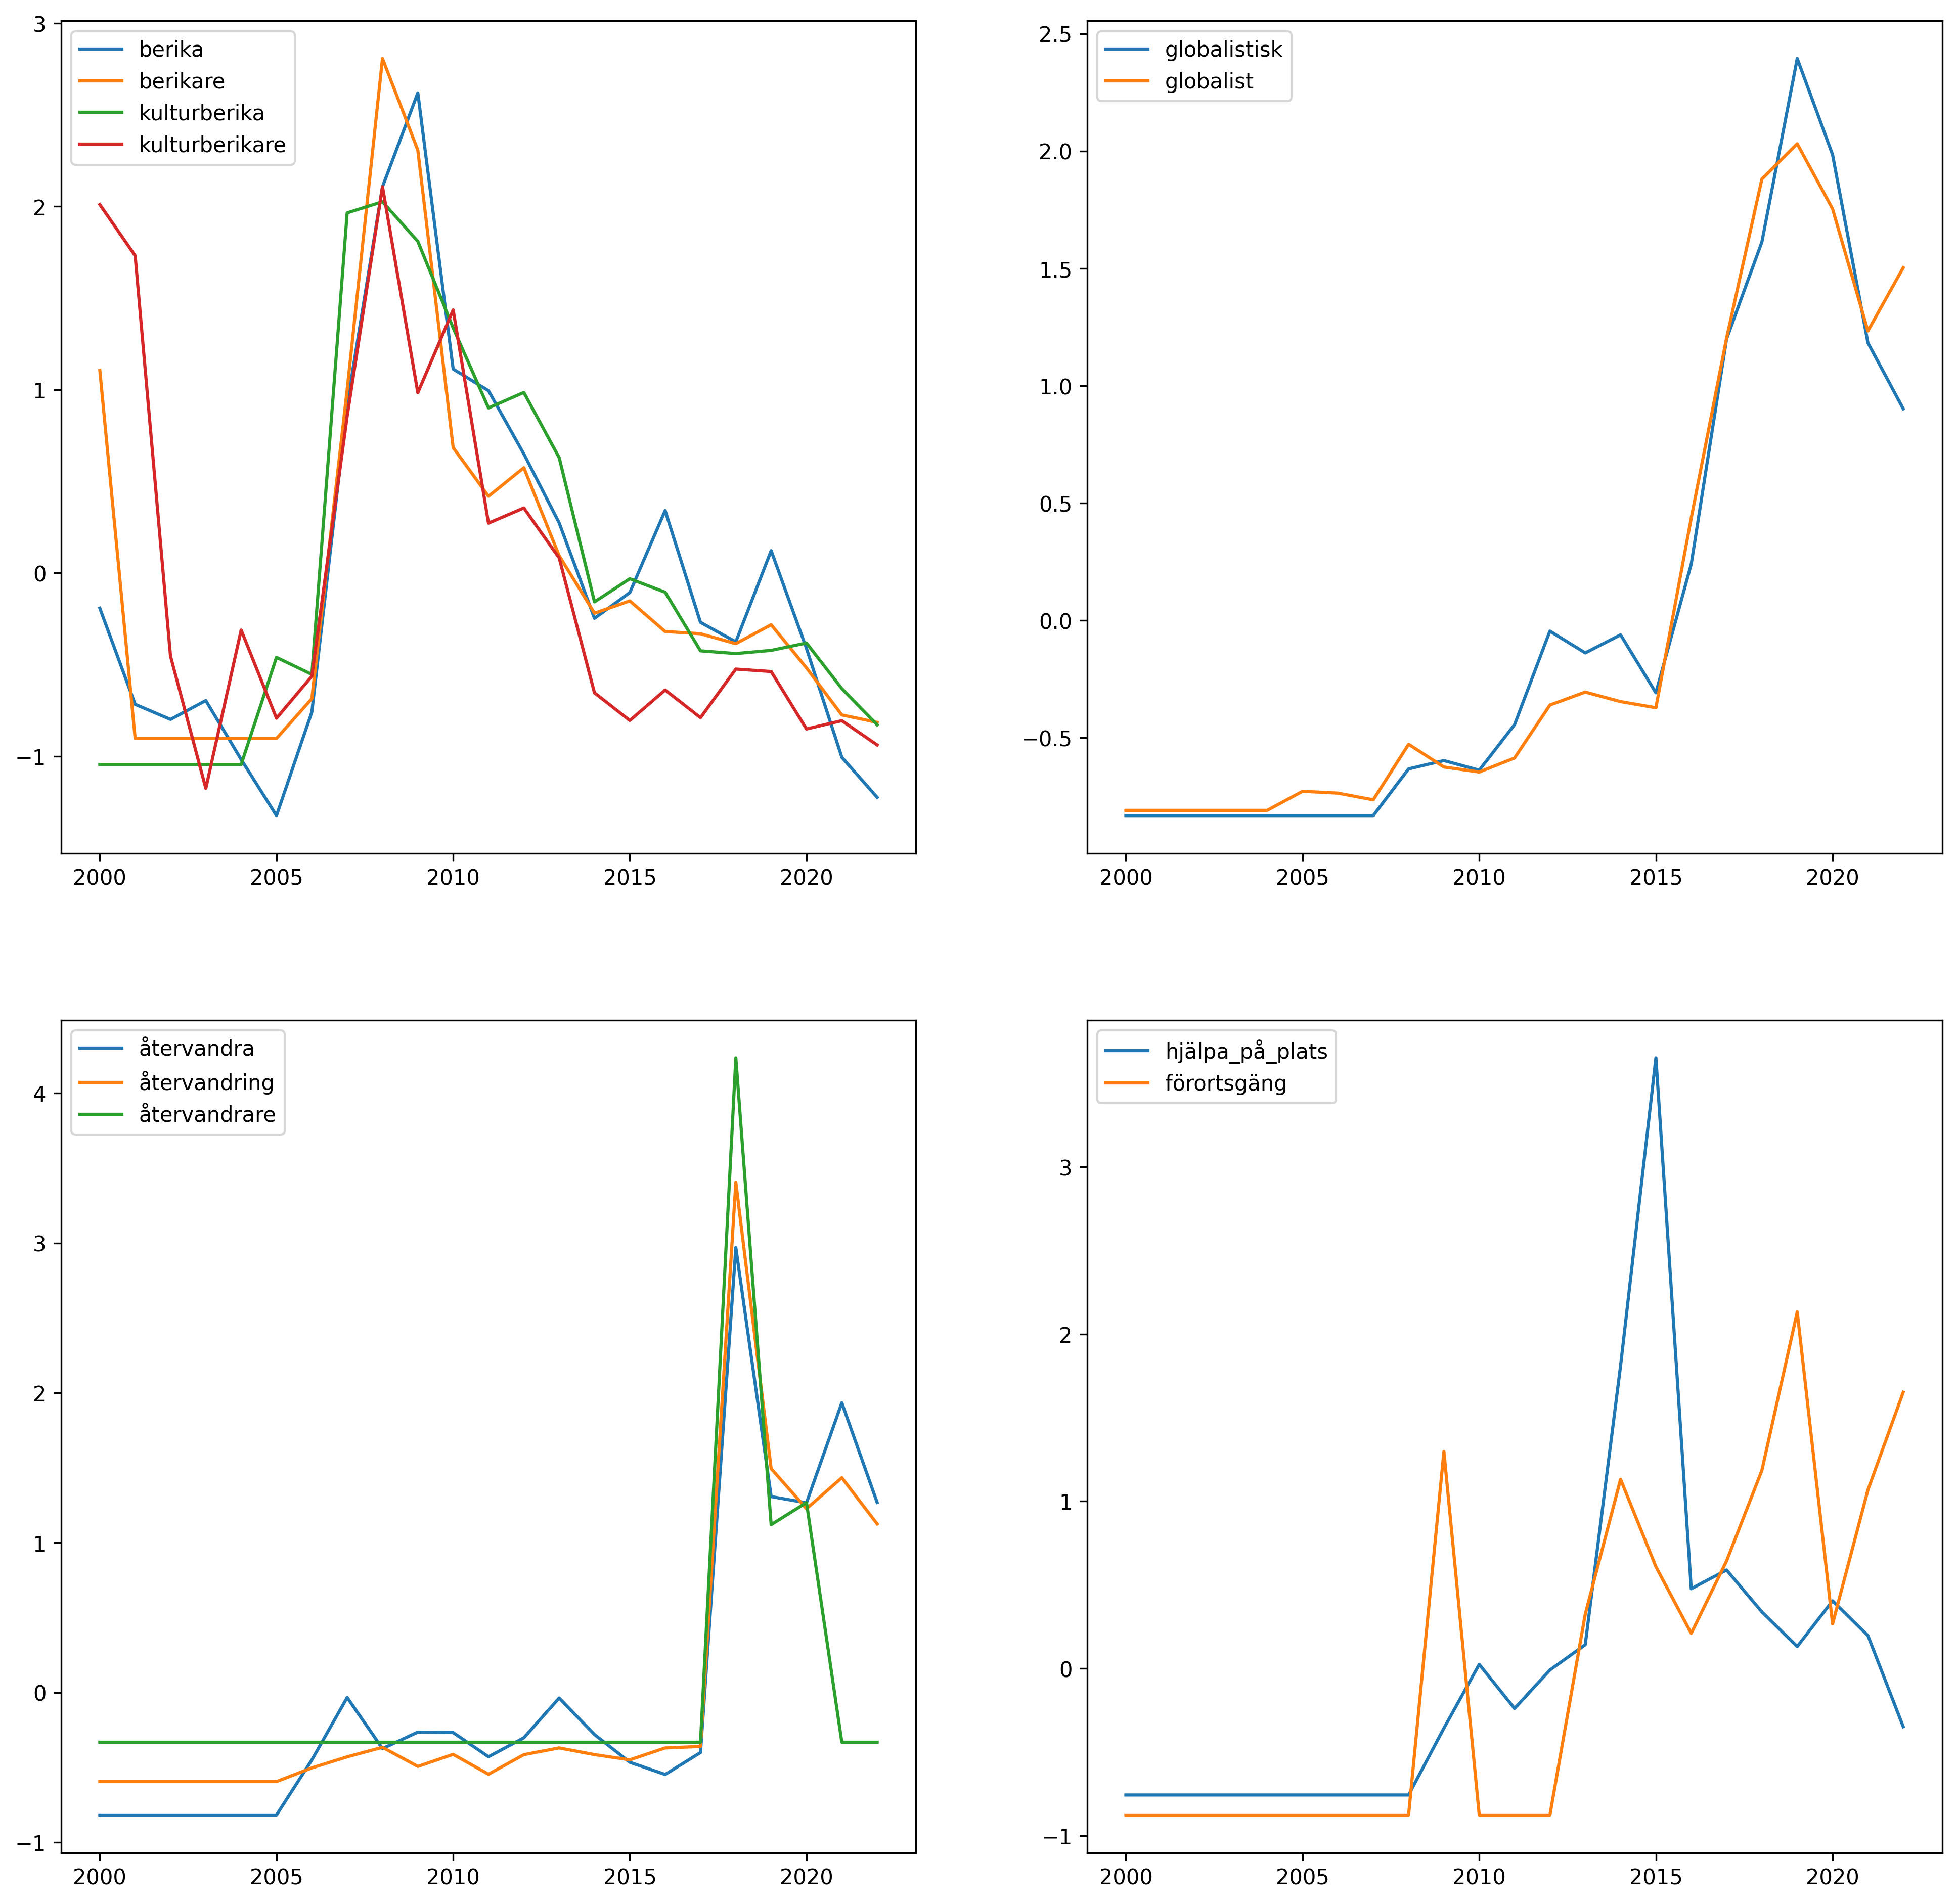

In [25]:
plt.figure(figsize=(16, 16), dpi=300)

plt.subplot(221)
for word in ["V1_berika", "N1_berikare", "V1_kulturberika", "N1_kulturberikare"]:
    plt.plot(years, zscore(lines[word]), label=word[3:])
plt.legend(loc="upper left")

plt.subplot(222)
for word in ["A1_globalistisk", "N1_globalist"]:
    plt.plot(years, zscore(lines[word]), label=word[3:])
plt.legend(loc="upper left")

plt.subplot(223)
for word in ["V1_återvandra", "N1_återvandring", "N2_återvandrare"]:
    plt.plot(years, zscore(lines[word]), label=word[3:])
plt.legend(loc="upper left")

plt.subplot(224)
for word in ["V1_hjälpa_på_plats", "N1_förortsgäng"]:
    plt.plot(years, zscore(lines[word]), label=word[3:])
plt.legend(loc="upper left")

plt.show()

### Bars 1

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(16, 16))

labels = F.sort_values("tot_frq", ascending=False).index
counts = F.sort_values("tot_frq", ascending=False)["tot_frq"]

ax.bar(labels, counts, edgecolor="white", linewidth=0.7)

plt.xticks(rotation=45, ha='right')
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### Bars 2

In [ ]:
plt.figure(figsize=(16, 16), dpi=300)

labels = F.sort_values("M_frq", ascending=False).index
means  = F.sort_values("M_frq", ascending=False)["M_frq"]
stds   = F.sort_values("M_frq", ascending=False)["Std_frq"]

plt.bar(labels, means,  yerr=stds)

plt.xticks(rotation=45, ha='right')

plt.show()


### Bars 3: Compound

In [ ]:
#### Grouped bars

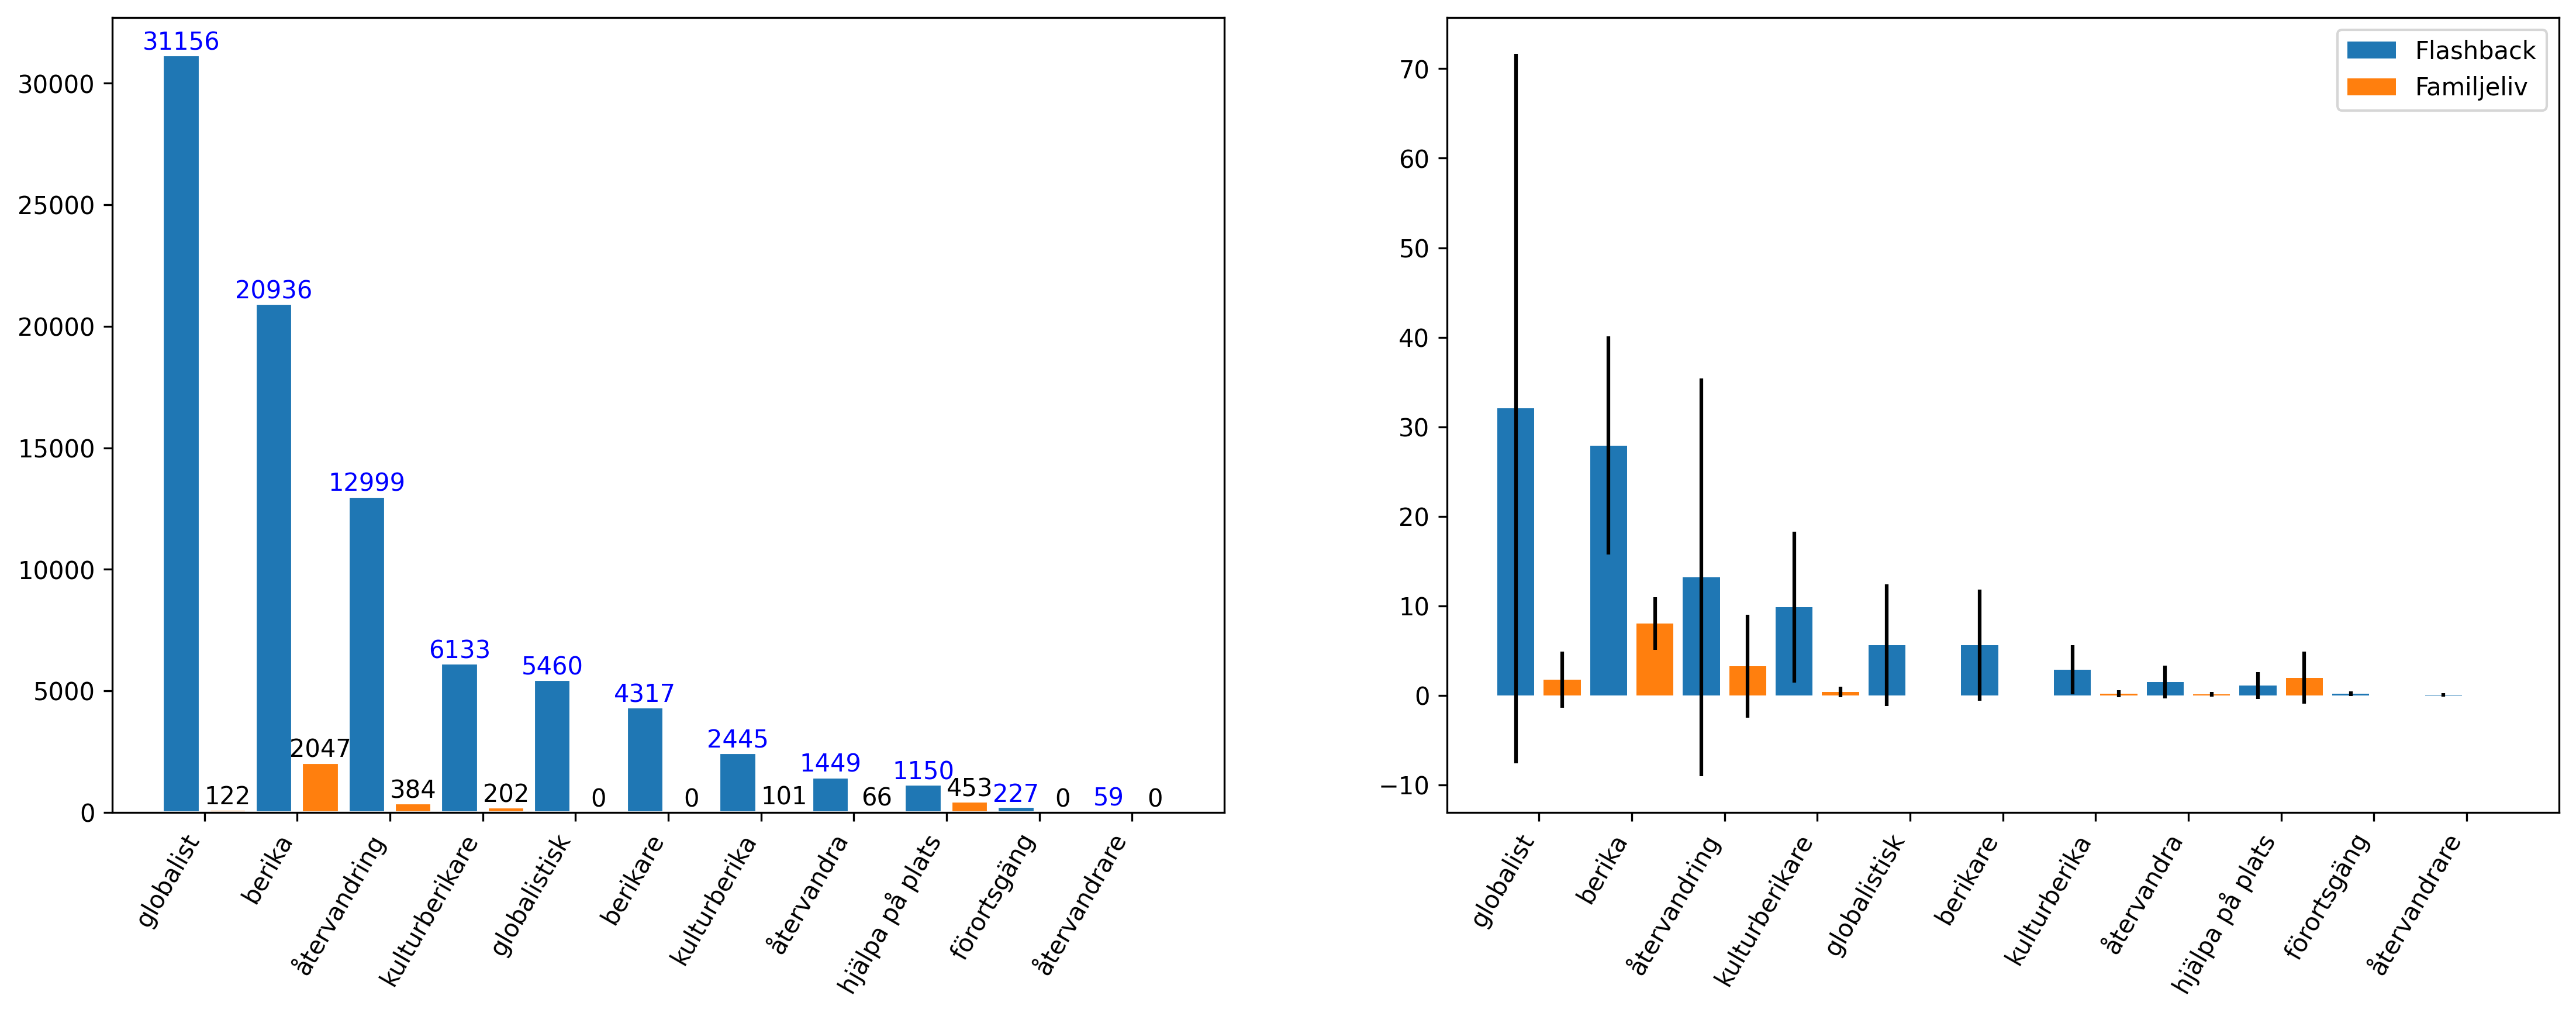

In [26]:
plt.figure(figsize=(18, 6), dpi=300)

labels = F.sort_values("tot_frq", ascending=False).index
width = 0.5
offset = 0.5
spacer = 2

## LEFT PANEL
plt.subplot(121) 
# F

counts_F = []
for w in labels:
    counts_F.append(F.loc[w]["tot_frq"])

#bars = plt.bar(labels, counts, edgecolor="white", linewidth=0.7)
space1=np.arange(1, len(labels)+1)*spacer - offset
bars = plt.bar(space1, counts_F, edgecolor="white", label=labels)
plt.bar_label(bars, color="b")

# R
#labels = R.sort_values("tot_frq", ascending=False).index

counts_R = [] 
for w in labels:
    if w in R.index:
        counts_R.append(R.loc[w]["tot_frq"])
    else:
        counts_R.append(0)

space2=np.arange(1, len(labels)+1)*spacer + offset        
bars = plt.bar(space2, counts_R, edgecolor="white", label=labels)
plt.bar_label(bars)

plt.xticks(
    np.arange(1, len(labels)+1)*spacer, 
    [" ".join(w.split("_")[1:]) for w in labels], 
    rotation=60, 
    ha='right'
)

## RIGHT PANEL
plt.subplot(122) 
# F
#labels = F.sort_values("M_frq", ascending=False).index
#means  = F.sort_values("M_frq", ascending=False)["M_frq"]
#stds   = F.sort_values("M_frq", ascending=False)["Std_frq"]

means_F = []
for w in labels:
    means_F.append(F.loc[w]["M_frq"])
stds_F = []
for w in labels:
    stds_F.append(F.loc[w]["Std_frq"])

plt.bar(space1, means_F,  yerr=stds_F)

# R
#labels = R.sort_values("M_frq", ascending=False).index
#means  = R.sort_values("M_frq", ascending=False)["M_frq"]
#stds   = R.sort_values("M_frq", ascending=False)["Std_frq"]

means_R = []
for w in labels:
    
    if w in R.index:
        means_R.append(R.loc[w]["M_frq"])
    else:
        means_R.append(0)    
    
stds_R = []
for w in labels:
    if w in R.index:
        stds_R.append(R.loc[w]["Std_frq"])
    else:
        stds_R.append(0)    

plt.bar(space2, means_R,  yerr=stds_R)

plt.xticks(
    np.arange(1, len(labels)+1)*spacer, 
    [" ".join(w.split("_")[1:]) for w in labels], 
    rotation=60, 
    ha='right'
)

#plt.rc('font', size=14)

plt.legend(["Flashback", "Familjeliv"])

#SMALL_SIZE = 8
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 12

plt.rc('font', size=10)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.show()

#### 1 group

In [ ]:
plt.figure(figsize=(16, 8), dpi=300)

plt.subplot(121)
labels = F.sort_values("tot_frq", ascending=False).index
counts = F.sort_values("tot_frq", ascending=False)["tot_frq"]

bars = plt.bar(labels, counts, edgecolor="white", linewidth=0.7)
plt.bar_label(bars)

plt.xticks(rotation=45, ha='right')

plt.subplot(122)
labels = F.sort_values("M_frq", ascending=False).index
means  = F.sort_values("M_frq", ascending=False)["M_frq"]
stds   = F.sort_values("M_frq", ascending=False)["Std_frq"]

plt.bar(labels, means,  yerr=stds)

plt.xticks(rotation=45, ha='right')

#plt.rc('font', size=14)

plt.show()

...

In [ ]:
plt.plot(F.loc["N1_globalist"]["fpm_2000": "fpm_2022"])
plt.xticks(rotation=90, ha='center')
plt.show()

In [ ]:
plt.plot(F.loc["V1_berika"]["fpm_2000": "fpm_2022"])
plt.xticks(rotation=90, ha='center')
plt.show()

In [ ]:
plt.plot(F.loc["N1_berikare"]["fpm_2000": "fpm_2022"])
plt.xticks(rotation=90, ha='center')
plt.show()

In [ ]:
plt.plot(F.loc["N1_kulturberikare"]["fpm_2000": "fpm_2022"])
plt.xticks(rotation=90, ha='center')
plt.show()

In [ ]:
plt.plot(F.loc["N1_återvandring"]["fpm_2000": "fpm_2022"])
plt.xticks(rotation=90, ha='center')
plt.show()

In [ ]:
plt.plot(F.loc["N1_globalist"]["fpm_2000": "fpm_2022"])
plt.plot(F.loc["V1_berika"]["fpm_2000": "fpm_2022"])
plt.plot(F.loc["N1_återvandring"]["fpm_2000": "fpm_2022"])
plt.plot(F.loc["N1_kulturberikare"]["fpm_2000": "fpm_2022"])
plt.xticks(rotation=90, ha='center')
plt.show()

## Another lock at `F x S` correlations

In [ ]:
results_dir = Path("../../dw_results")

In [ ]:
df_yearly_dwt = read_csv(results_dir / "fb_pol-yearly-radical3-restricted.csv", sep=";")

In [ ]:
df_bert_kb  = read_csv(results_dir / "fb_pol-yearly-bert-sentence-bert-swedish-cased.csv", sep=";")

In [ ]:
df_cluster = read_csv(results_dir / "fb_pol-yearly-cluster-sentence-bert-swedish-cased.csv", sep=";")

In [ ]:
def find_transitions(source, mode="file", var = None):
    """
    List transitions. 
    For mode = "file", expected source: filepath
    For mode = "df", expected source: pandas DataFrame; provide varible var
    """
    if mode == "file":
        years = [int(file.strip(".txt")) for file in os.listdir(source)]
        years.sort()
        transitions = [(year, years[i]) for i, year in enumerate(years[:-1], start=1)]
    if mode == "df":
        cols = [col for col in source.columns if col.startswith(var)]
        cols.sort()
        transitions = [tuple(col.split("_")[-1].split(":")) for col in cols]
    return transitions

In [ ]:
def vis_cor(
    df, 
    var1, 
    var2,
    var3,
    var1tr = True, 
    var2tr = True, 
    var3tr = True,
    prenorm1 = None,
    prenorm2 = None,
    norm1=None, 
    norm2=None,
    norm3=None
):    
    """
    
    ...
    param norm1  function to normalize/transform var1 with (default None); provide function 
                 e.g. zscore or np.log 
    """

    tr1 = find_transitions(df, "df", var1)
    if var1tr == False:
        tr1 = [f"{var1}_{tr[0]}" for tr in tr1] # Note choses 1st ## VAR CUT!
    else:
        tr1 = [f"{var1}_{ti}:{tj}" for ti, tj in tr1]
    
    tr2 = find_transitions(df, "df", var2)
    if var2tr == False:
        tr2 = [f"{var2}_{tr[0]}" for tr in tr2]
    else:
        tr2 = [f"{var2}_{ti}:{tj}" for ti, tj in tr2]
        
    tr3 = find_transitions(df, "df", var3)
    if var3tr == False:
        tr3 = [f"{var3}_{tr[0]}" for tr in tr3]
    else:
        tr3 = [f"{var3}_{ti}:{tj}" for ti, tj in tr3] 
    
    #print(tr3)
    
    plt.figure(figsize=(10, 12), dpi=300)
    nrows = int(len(df.index) / 2)
    print("No. rows =", nrows, "No. words =", len(df.index))
    #fig, axs = plt.subplots(nrows, 2)
    
    my_ticks = [f"{y:02d}:{y+1:02d}" for y in range(0, 22)]
    
    for iorder, (w, _) in enumerate(sorted([(true, true.split("_")[-1]) for true in df.index], key=lambda x: x[-1]), start=1):

        print(w)
        valid = []
        transitions = []
        X = df[tr1].loc[w]
        Y = df[tr2].loc[w]
        Z = df[tr3].loc[w]
        for x, y, z, transition in zip(X, Y, Z, tr1):
            if pd.isna(x):
                continue
            if pd.isna(y):
                continue
            if pd.isna(z):
                continue
            valid.append((x, y, z))
            transitions.append(transition)

        N = len(valid)
#         print(valid)
#         print(transitions)

        if N < 2:
            continue
            #print("Nope ...")
            #print()
        else:
            X, Y, Z = zip(*valid)
            
            if prenorm1 != None:
                X = prenorm1(X)
            if prenorm2 != None:
                Y = prenorm2(Y)
                
            if norm1 != None:
                X = norm1(X)
            if norm2 != None:
                Y = norm2(Y)
            if norm3 != None:
                Z = norm3(Z)

            #Tx = range(len(X))
            #Ty = range(len(Y))
            T = [int(trans[-4:]) for trans in transitions]

            #plt.plot(Tx, X, Ty, Y, marker = 'o')
            plt.subplot(nrows,2,iorder)
            #plt.figure(figsize=(8, 8), dpi=300)
            plt.plot(T, X, "-b", label=var1)
            plt.plot(T, Y, "--r", label=var2)
            plt.plot(T, Z, "--g", label=var3)
            #plt.xticks(np.arange(rotation=45, ha='right', fontsize='small')
            #plt.xticks(np.arange(2000, 2022, step=1), rotation=45, fontsize='small')
            plt.xticks(np.arange(2000, 2022, step=1), my_ticks, rotation=45, ha='right', fontsize='small')
            w = w.replace("N1_", "").replace("N2_", "").replace("V1_", "").replace("A1_","")
            w = w.replace("_", " ")
            rho_rect  = round(spearmanr(X, Y).statistic, 3)
            rho_naive = round(spearmanr(X, Z).statistic, 3)  
            w = f"{w} ($ρ$={rho_naive}, $ρ$*={rho_rect})"
            plt.title(w, fontsize='medium')
            
            #handles, labels = ax.get_legend_handles_labels()
    
#    if var3 == "gch":
#        txt_var3 = "nch"
#    else:
#        txt_var3 = var3

#    plt.figlegend(labels=[var1, var2, txt_var3], loc='upper center', ncol=3)
    plt.figlegend(
        labels=["fpm", "Δ*", "Δ"], 
        loc='upper center', 
        ncol=1
    )
    
    #leg = plt.legend()
    #leg.get_frame().set_edgecolor('b') 
    #eg.get_frame().set_linewidth(2.0)
    plt.tight_layout()
    plt.show()
                

In [ ]:
dwts=[dwt for dwt in df_bert_kb.index if dwt.startswith(("N1_", "N2_", "A1_", "V1_", "P1_"))]
dwts=[dwt for dwt in dwts if not dwt.startswith("P1")]
dwts=[dwt for dwt in dwts if dwt != "N2_återvandrare"]
print(dwts)

In [ ]:

vis_cor(
    df=df_bert_kb.loc[dwts,:], 
    var1="fpm", 
    var2="rch", 
    var3="gch",
    var1tr = False, 
    var2tr = True, 
    var3tr = True,
    prenorm1 = np.log,
    prenorm2 = None,
    norm1=zscore,
    norm2=zscore,
    norm3=zscore,
)